In [1]:
library(ArchR)
library(here)
library(Seurat)
library(SeuratDisk)
library(SingleCellExperiment)
options(repr.plot.width=15, repr.plot.height=11)

## add general functions at the top of the R scripts
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [2]:
#archr settings
addArchRGenome("mm10")
addArchRThreads(threads = 8) 

Setting default genome to Mm10.

Setting default number of Parallel threads to 8.



In [3]:
#load project to be used
proj = loadArchRProject(here("data/tidy_data/ArchRProjects/BICCN_mouse_Str_snATAC2"))

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [4]:
colData = getCellColData(proj)
colnames(colData)

[1] "Sample"                "TSSEnrichment"         "ReadsInTSS"           
 [4] "ReadsInPromoter"       "ReadsInBlacklist"      "PromoterRatio"        
 [7] "PassQC"                "NucleosomeRatio"       "nMultiFrags"          
[10] "nMonoFrags"            "nFrags"                "nDiFrags"             
[13] "DoubletScore"          "DoubletEnrichment"     "BlacklistRatio"       
[16] "DissectionRegion"      "biorep"                "time"                 
[19] "ProtocalVersion"       "RegionName"            "MajorRegion"          
[22] "SubRegion"             "DetailRegion"          "PotentialOverlap"     
[25] "Slice"                 "MajorRegionColor"      "SubRegionColor"       
[28] "DissectionRegionColor" "NumMiceInPool"         "Instrument"           
[31] "match"                 "L1"                    "L2"                   
[34] "L3"                    "L4"                    "pL4"                  
[37] "NeuronTransmitter"     "Subclass"              "ClustersX300"

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-51df3a6327ac-Date-2024-03-18_Time-16-01-56.607839.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
2 
3 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-51df3a6327ac-Date-2024-03-18_Time-16-01-56.607839.log

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


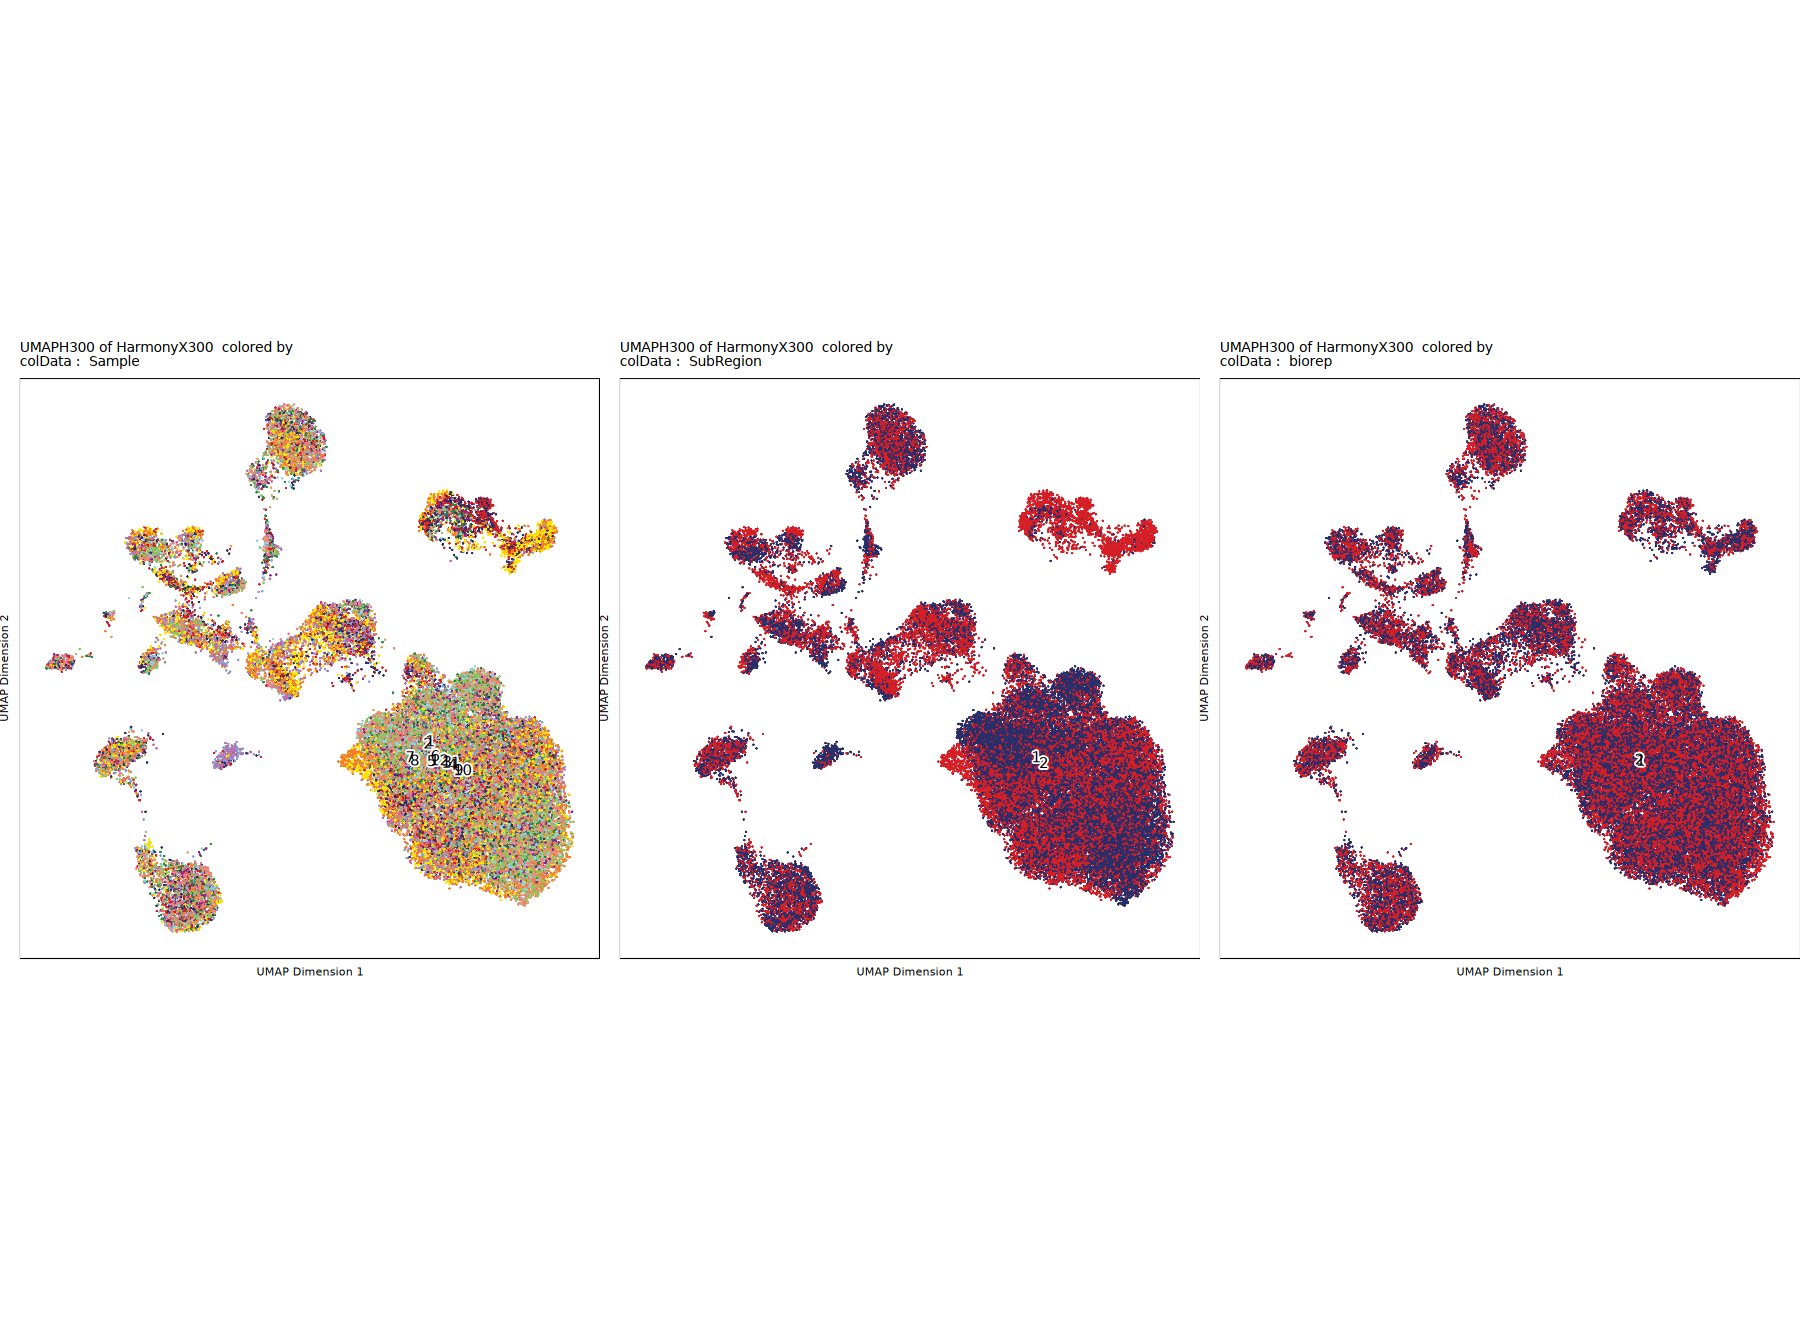

In [5]:
p <- plotEmbedding( ArchRProj = proj, colorBy = "cellColData", name = c('Sample', 'SubRegion', 'biorep'), embedding = "UMAPH300") 
p3 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
          axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p3))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-51df450ce7a1-Date-2024-03-18_Time-16-07-10.154535.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-51df450ce7a1-Date-2024-03-18_Time-16-07-10.154535.log



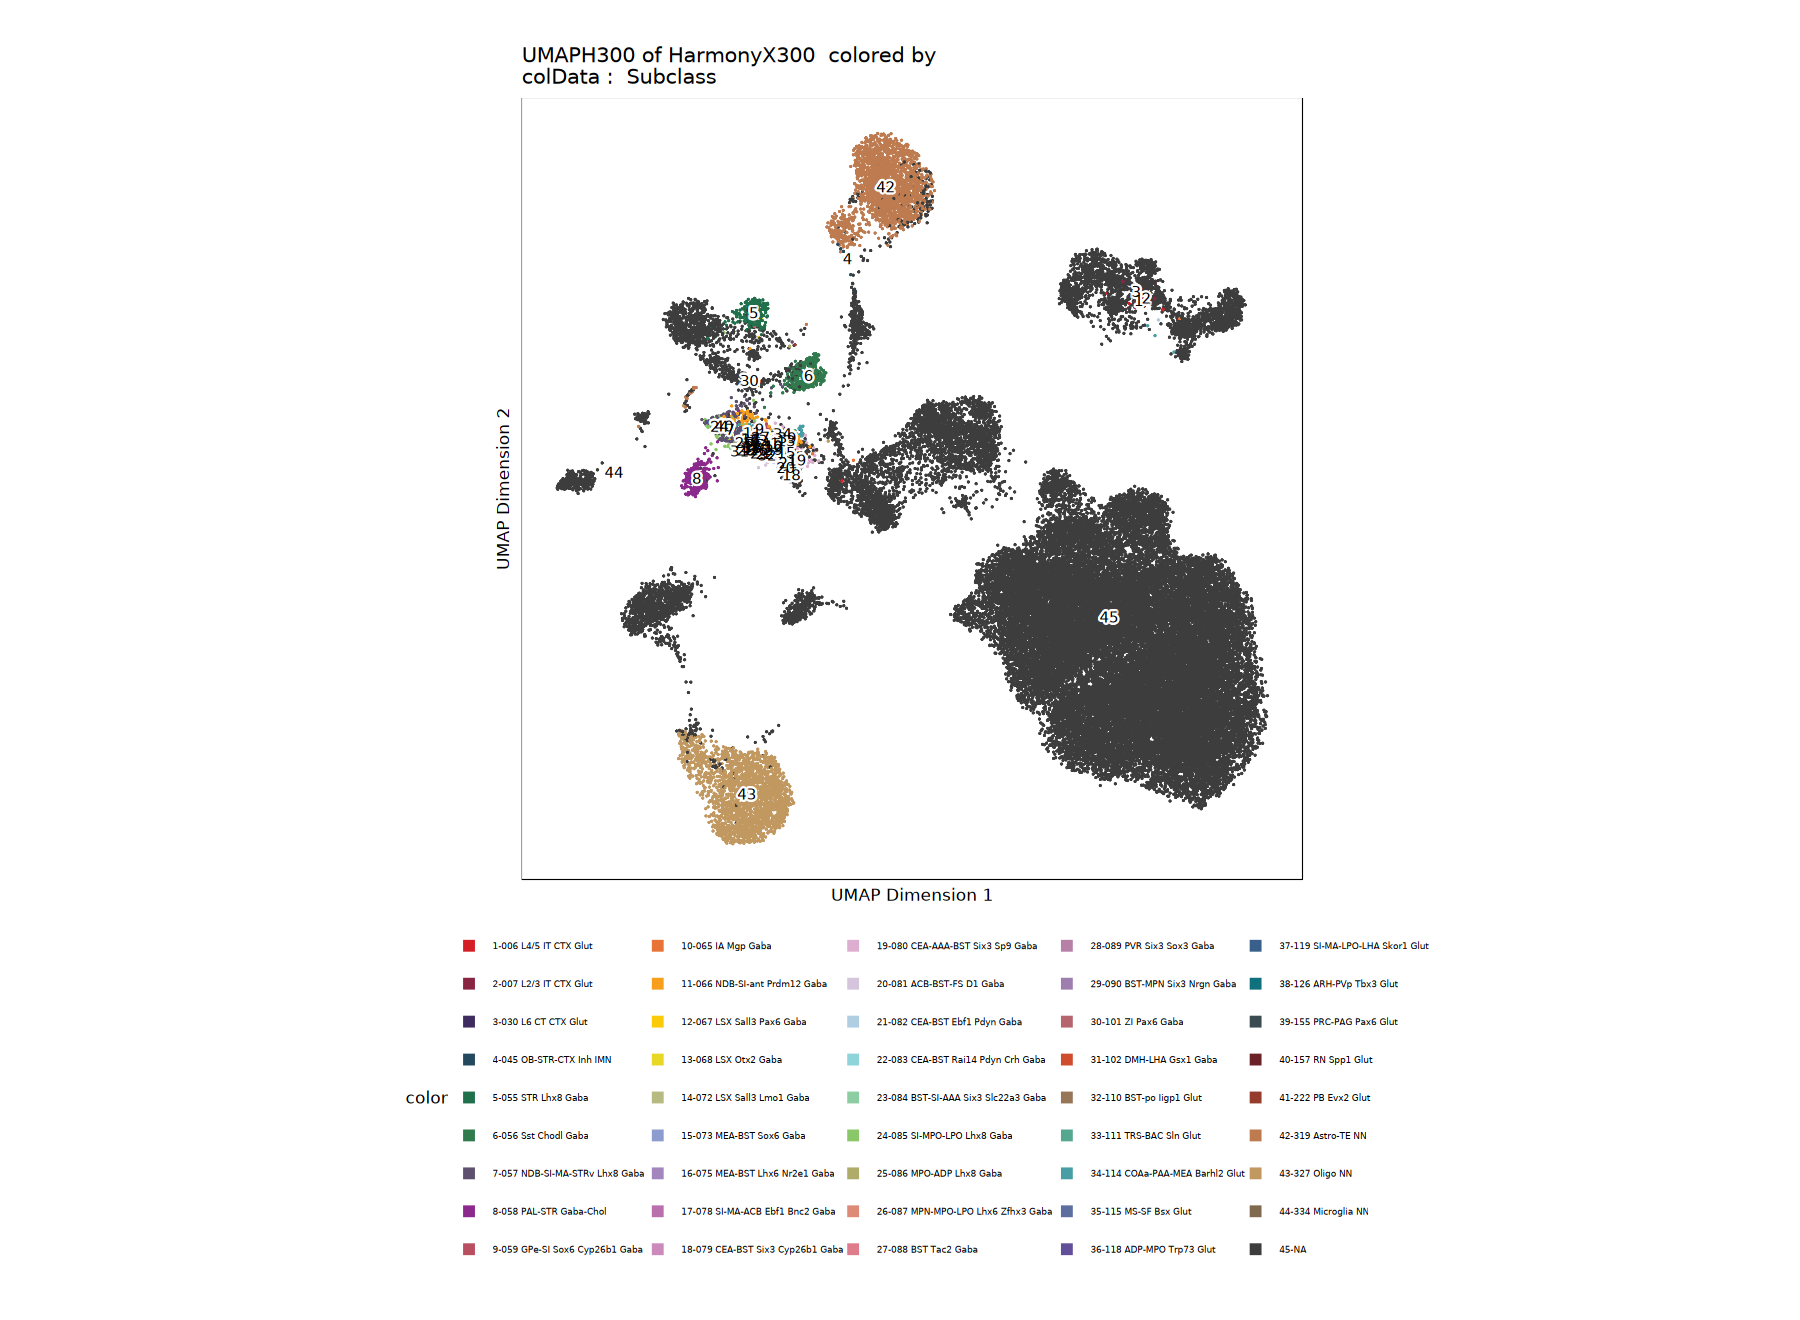

In [14]:
p <- plotEmbedding( ArchRProj = proj, colorBy = "cellColData", name = c('Subclass'), embedding = "UMAPH300") 
p

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-51df1aeab98e-Date-2024-03-18_Time-16-03-09.487879.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2024-03-18 16:03:10.078911 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 
9 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-51df1aeab98e-Date-2024-03-18_Time-16-03-09.487879.log



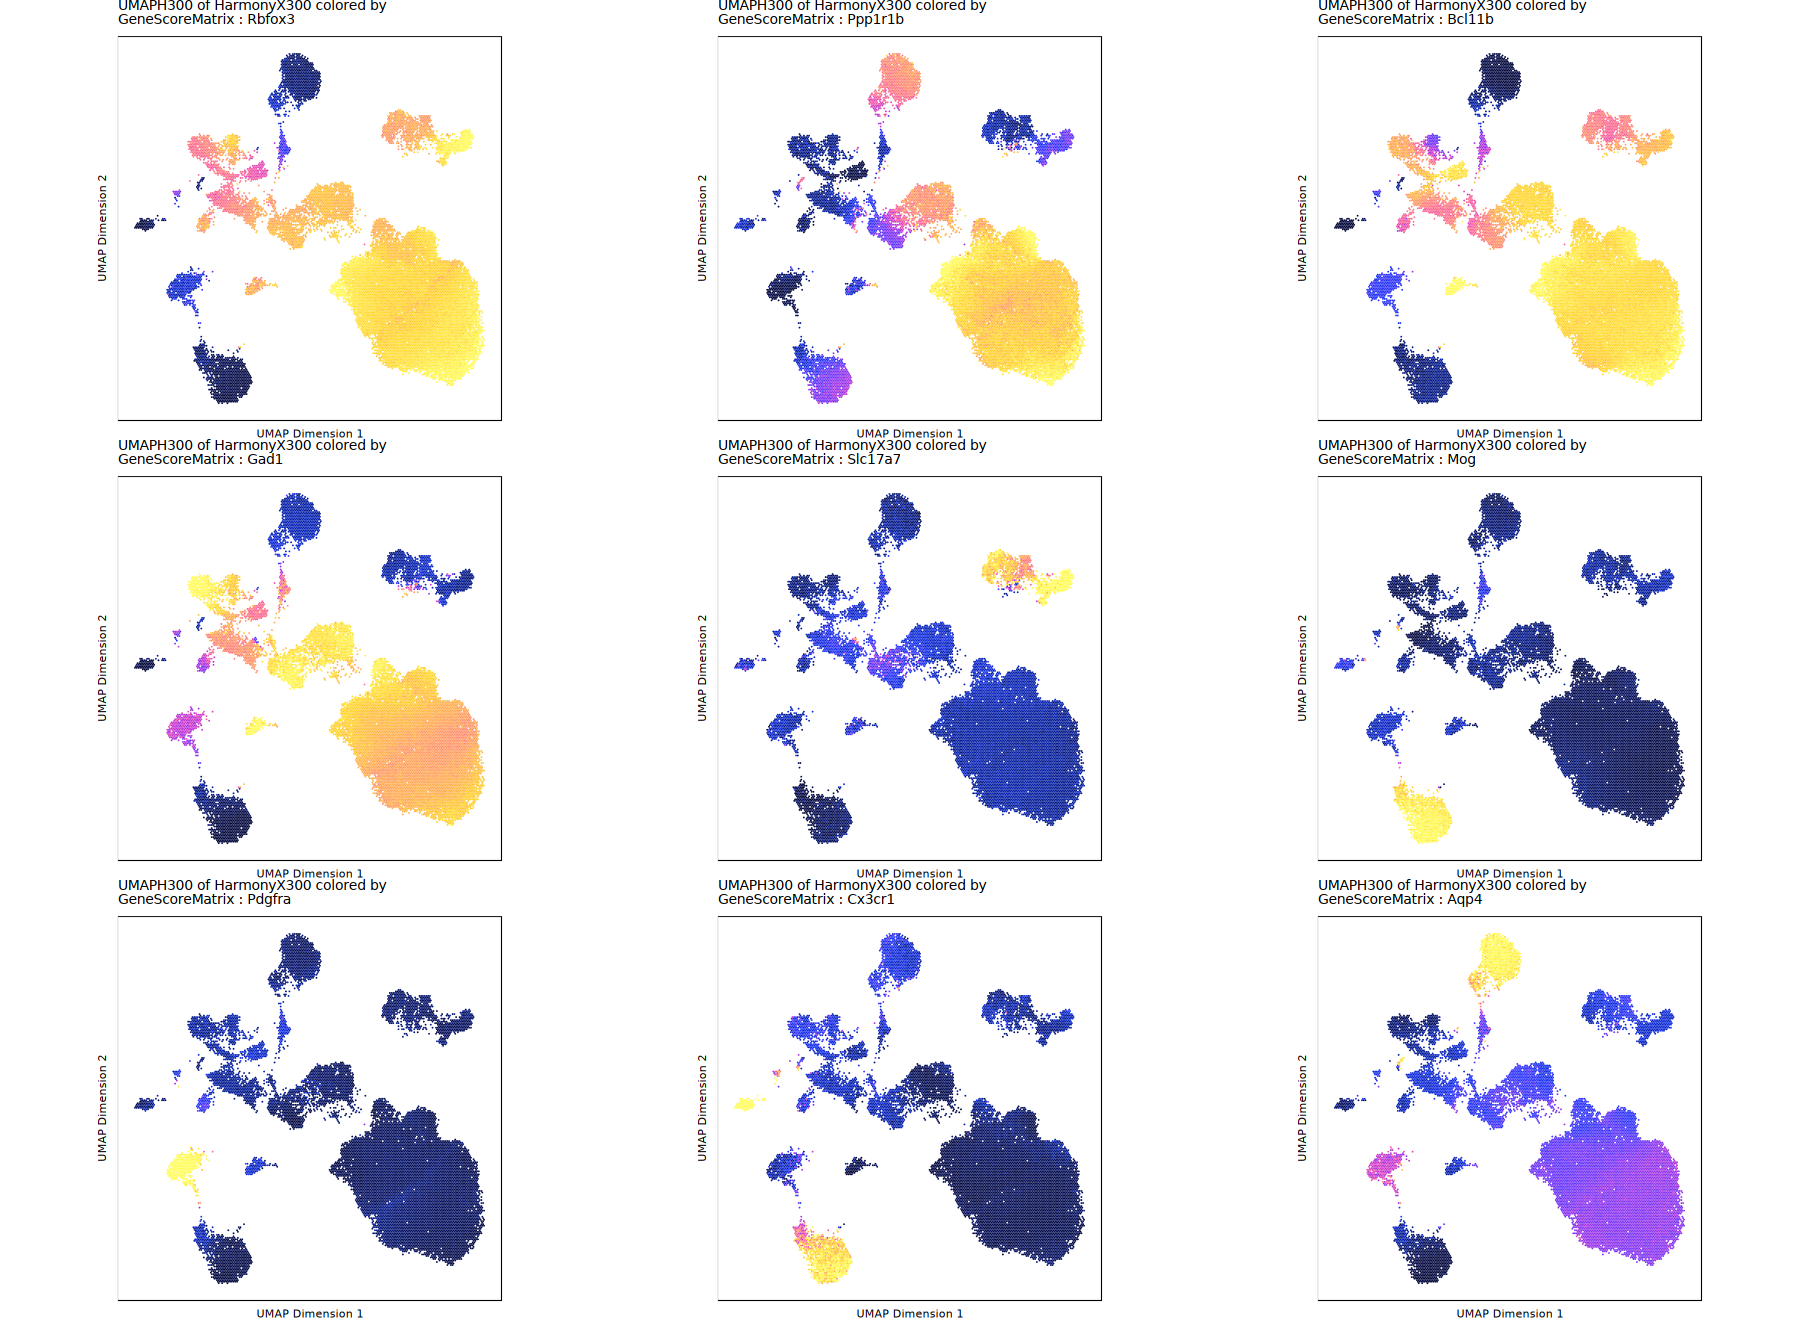

In [9]:
# MSN markers, Ppp1r1b = DARPP-32, Bcl11b=Ctip2
markMSN3 = c('Rbfox3', 'Ppp1r1b','Bcl11b', 'Gad1', 'Slc17a7', 'Mog', 'Pdgfra', 'Cx3cr1', 'Aqp4')
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN3, embedding = "UMAPH300") #, imputeWeights = NULL)
p3 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p3))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-51df4af431e7-Date-2024-03-18_Time-16-04-39.718975.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2024-03-18 16:04:40.446943 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-51df4af431e7-Date-2024-03-18_Time-16-04-39.718975.log



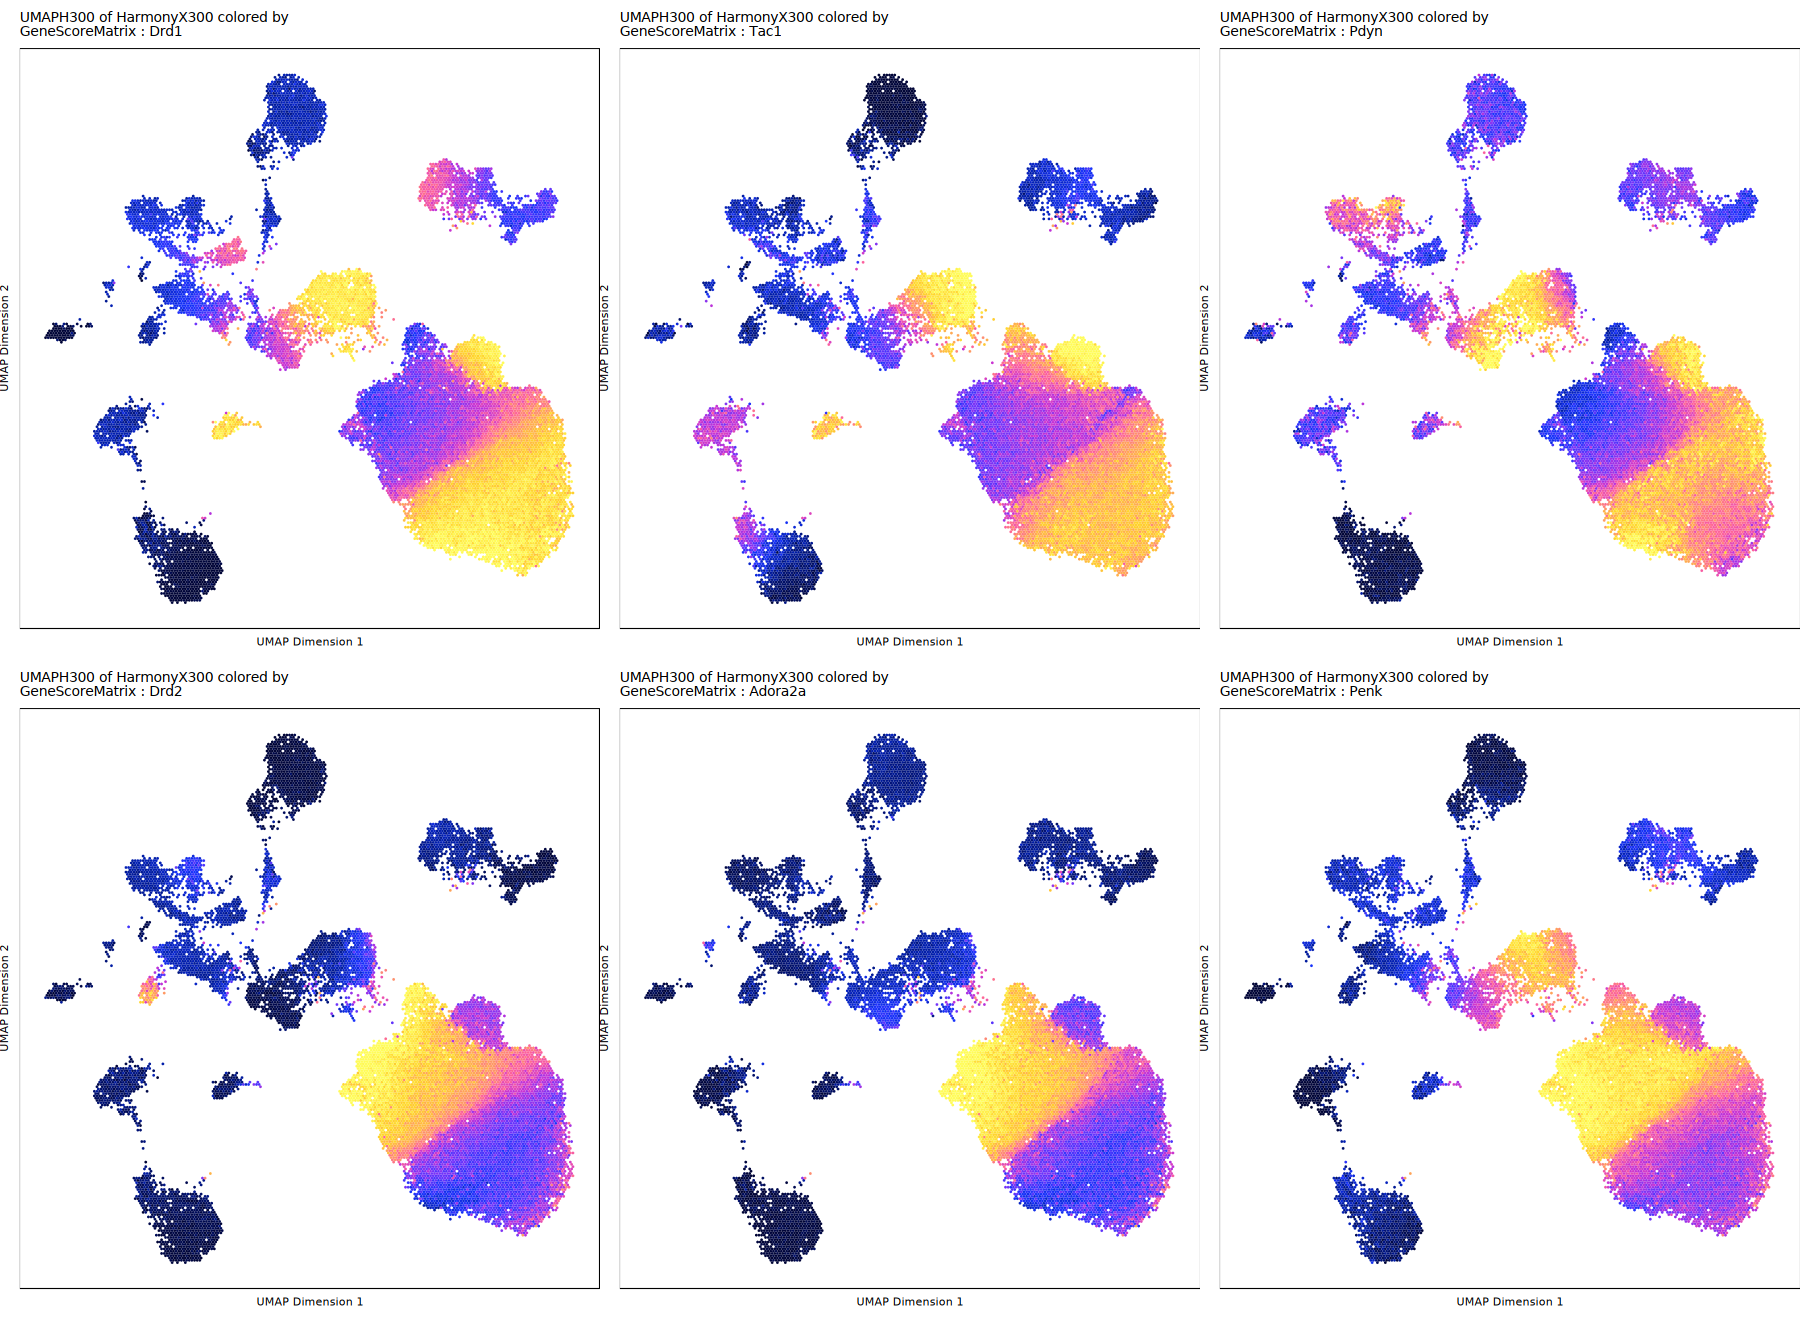

In [10]:
markMSN1 = c('Drd1','Tac1', 'Pdyn', 'Drd2','Adora2a','Penk') # D1 & D2 markers

# D1 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN1, embedding = "UMAPH300") #, imputeWeights = NULL) # 
p1 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme( axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
           axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p1))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-51df1a12015f-Date-2024-03-18_Time-16-05-29.585039.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2024-03-18 16:05:30.244732 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-51df1a12015f-Date-2024-03-18_Time-16-05-29.585039.log



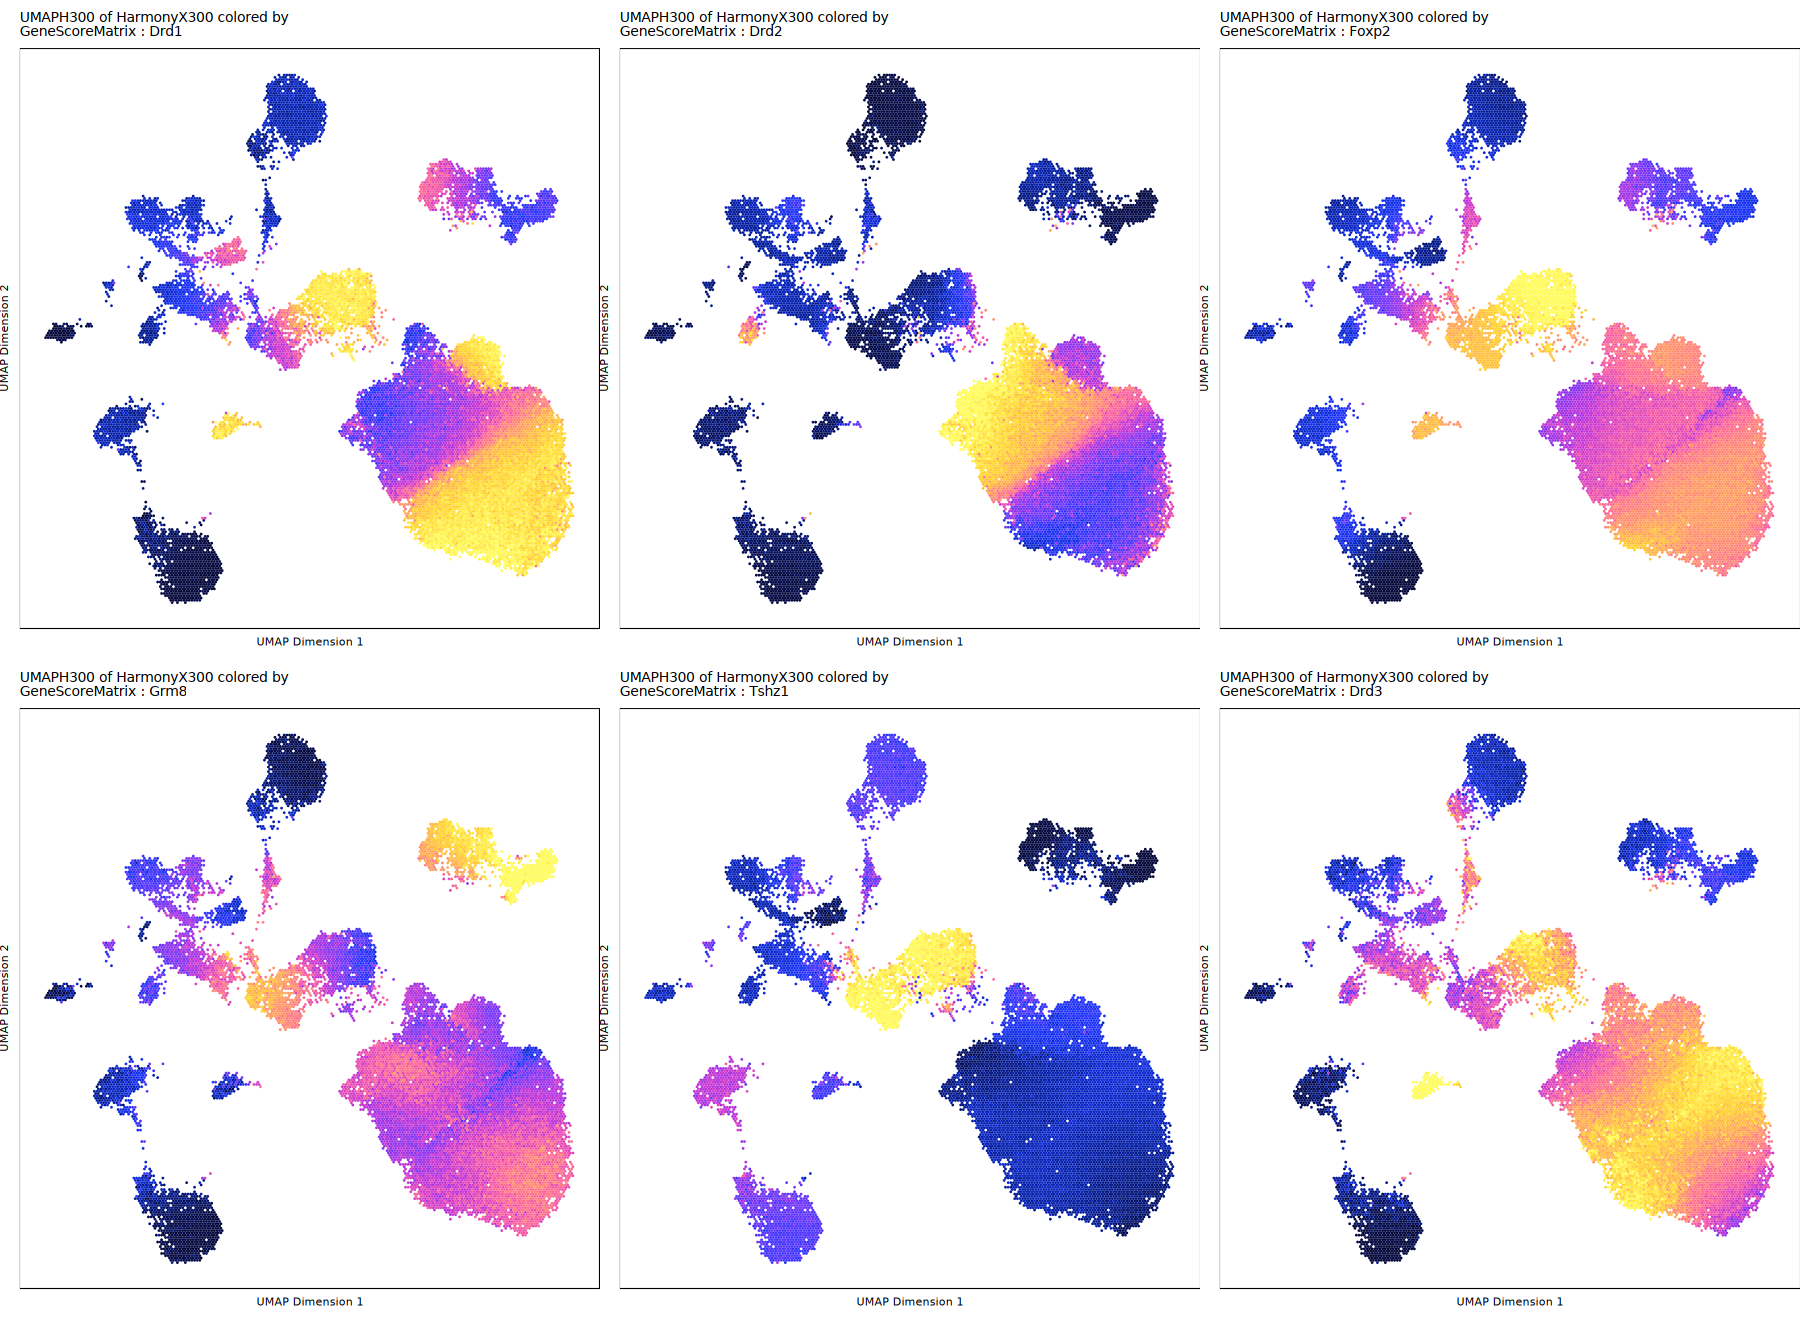

In [11]:
markMSN2 = c('Drd1', 'Drd2', 'Foxp2', 'Grm8','Tshz1', 'Drd3')# eSPN, D1/D2, IC markers

# D2 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN2, embedding = "UMAPH300") #, imputeWeights = NULL)
p2 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-51df37f3495b-Date-2024-03-18_Time-16-06-15.091043.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2024-03-18 16:06:15.787725 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-51df37f3495b-Date-2024-03-18_Time-16-06-15.091043.log



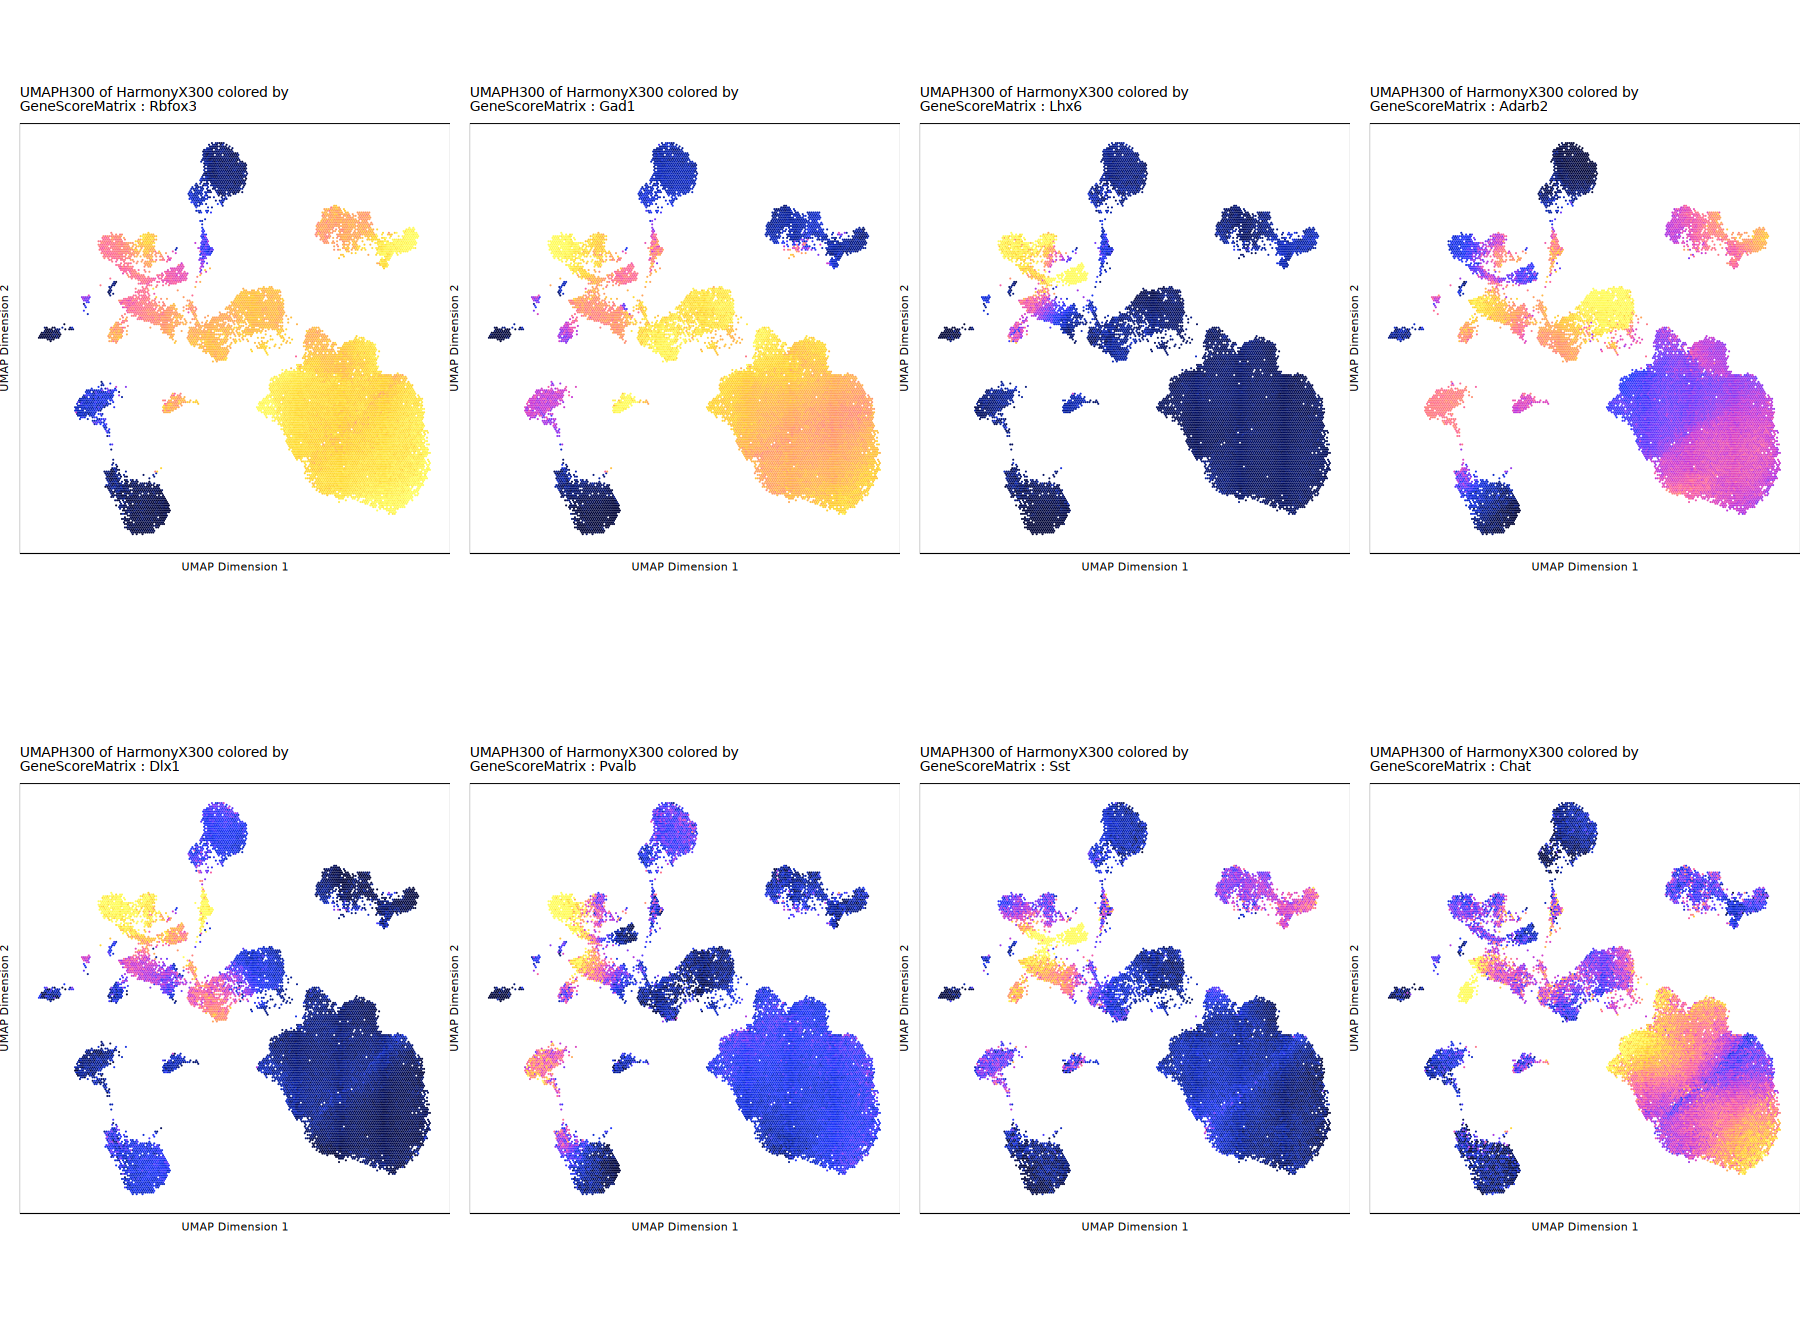

In [12]:
markINT2 = c('Rbfox3', 'Gad1','Lhx6','Adarb2', 'Dlx1', 'Pvalb', 'Sst','Chat')# striatal interneuron markers

# D2 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markINT2, embedding = "UMAPH300")
p2 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 4),p2))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-51df398533e6-Date-2024-03-18_Time-16-07-05.825977.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-51df398533e6-Date-2024-03-18_Time-16-07-05.825977.log



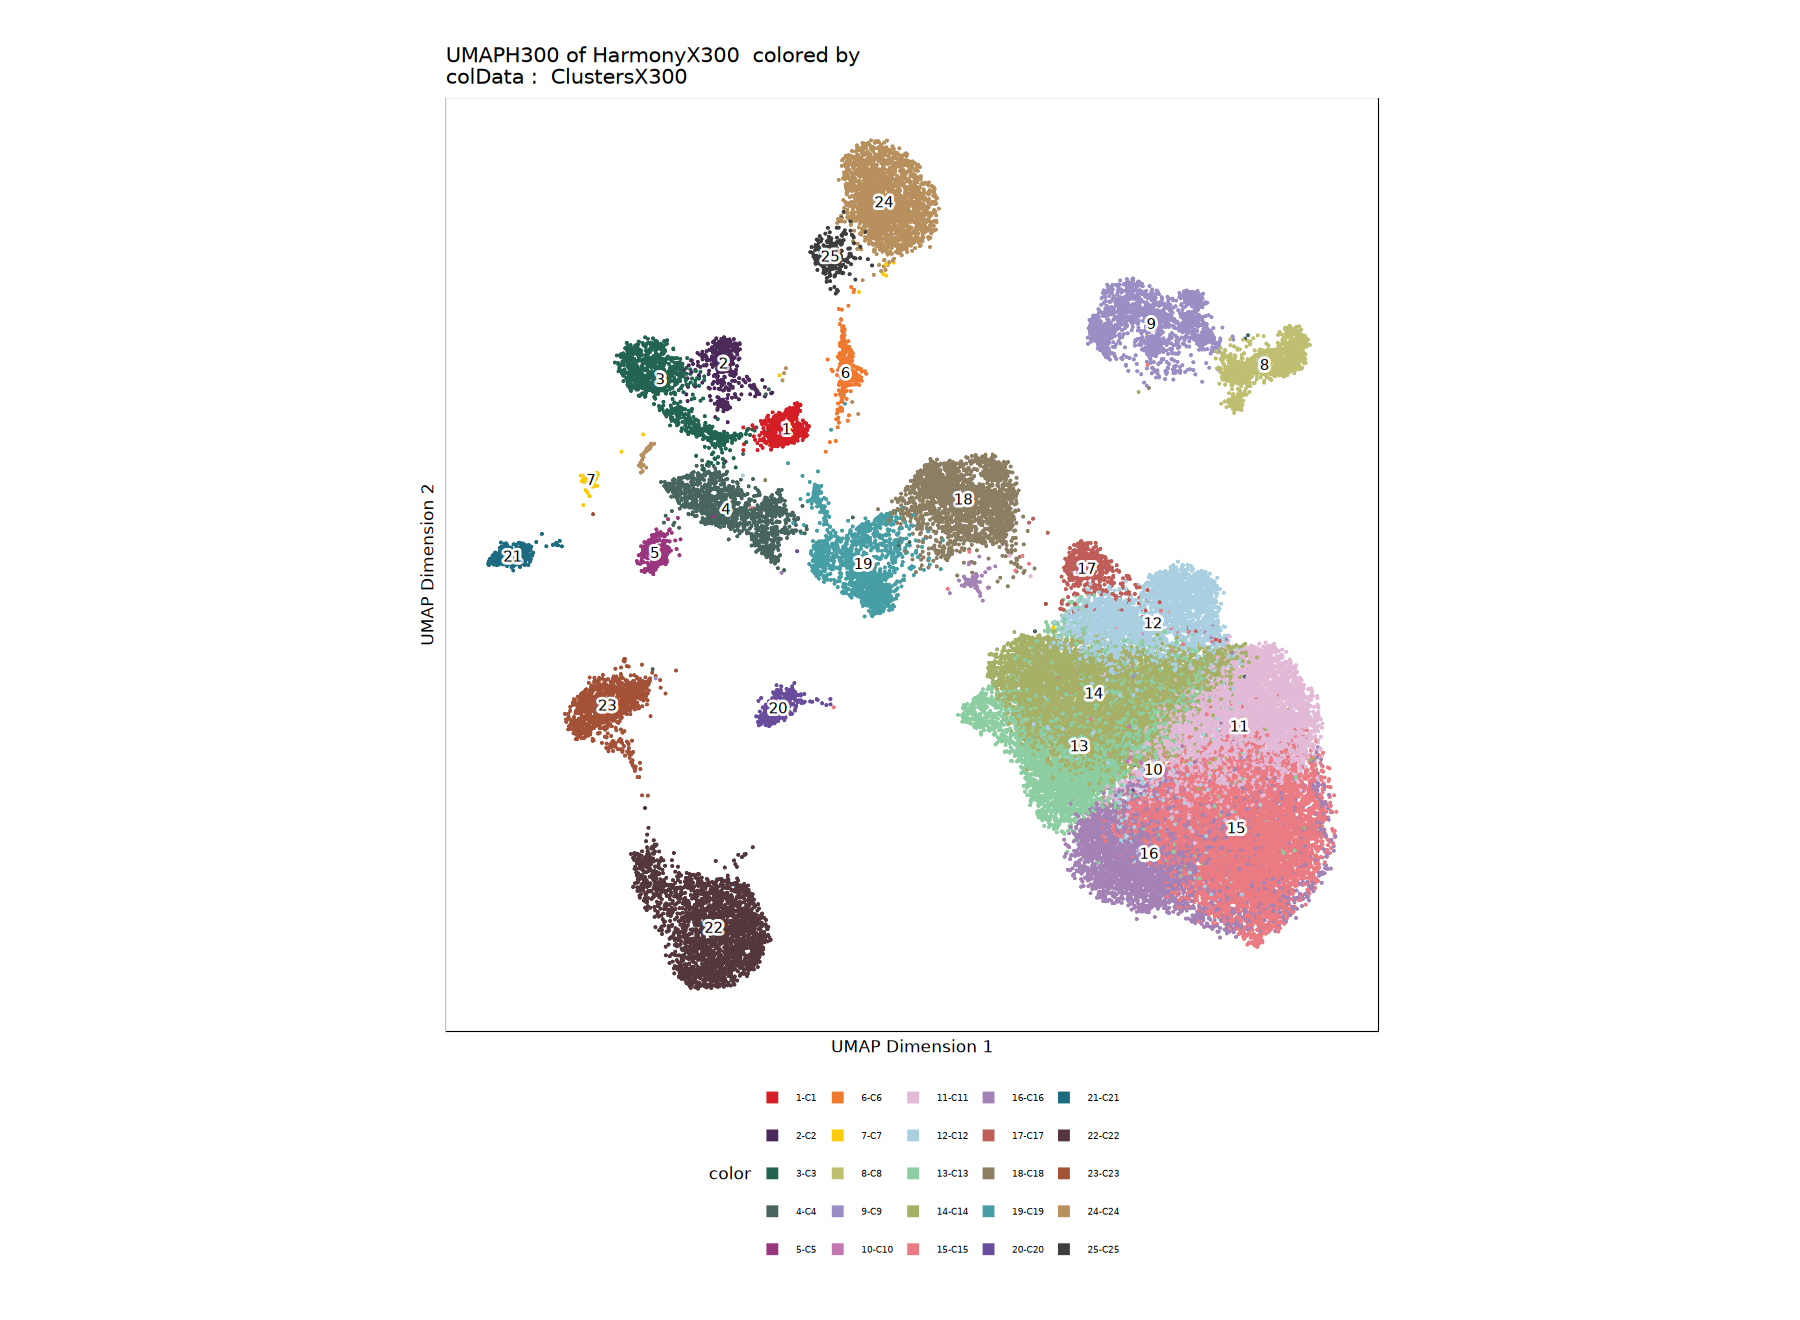

In [13]:
plotEmbedding( ArchRProj = proj, colorBy = "cellColData", name = c('ClustersX300'), embedding = "UMAPH300") 

In [15]:
###########################################
# using marker gene scores, give cluster names
remapClust <- c(
    'C1' = 'INT',
    'C2' = 'INT',
    'C3' = 'INT',
    'C4' = 'INT',
    'C5'  = 'INT',
    'C6' = 'Drop',
    'C7' = 'Drop',
    'C8' = 'Excitatory',
    'C9'  = 'Excitatory', 
    'C10'= 'MSN',
    'C11' = 'MSN',
    'C12' = 'MSN',
    'C13' = 'MSN',
    'C14' = 'MSN',
    'C15'  = 'MSN',
    'C16' = 'MSN',
    'C17' = 'MSN',
    'C18' = 'MSN',
    'C19'  = 'MSN', 
    'C20'= 'MSN',
    'C21' = 'Microglia',
    'C22' = 'Oligo',
    'C23' = 'OPC',
    'C24' = 'Astro', 
    'C25' = 'Astro')
proj$Clusters2 <- mapLabels(proj$ClustersX300, newLabels = remapClust, oldLabels = names(remapClust))
table(proj$Clusters2)


     Astro       Drop Excitatory        INT  Microglia        MSN      Oligo 
      2387        397       2364       3318        267      36241       2296 
       OPC 
       956 

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-51df48657937-Date-2024-03-18_Time-16-12-31.62696.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-51df48657937-Date-2024-03-18_Time-16-12-31.62696.log



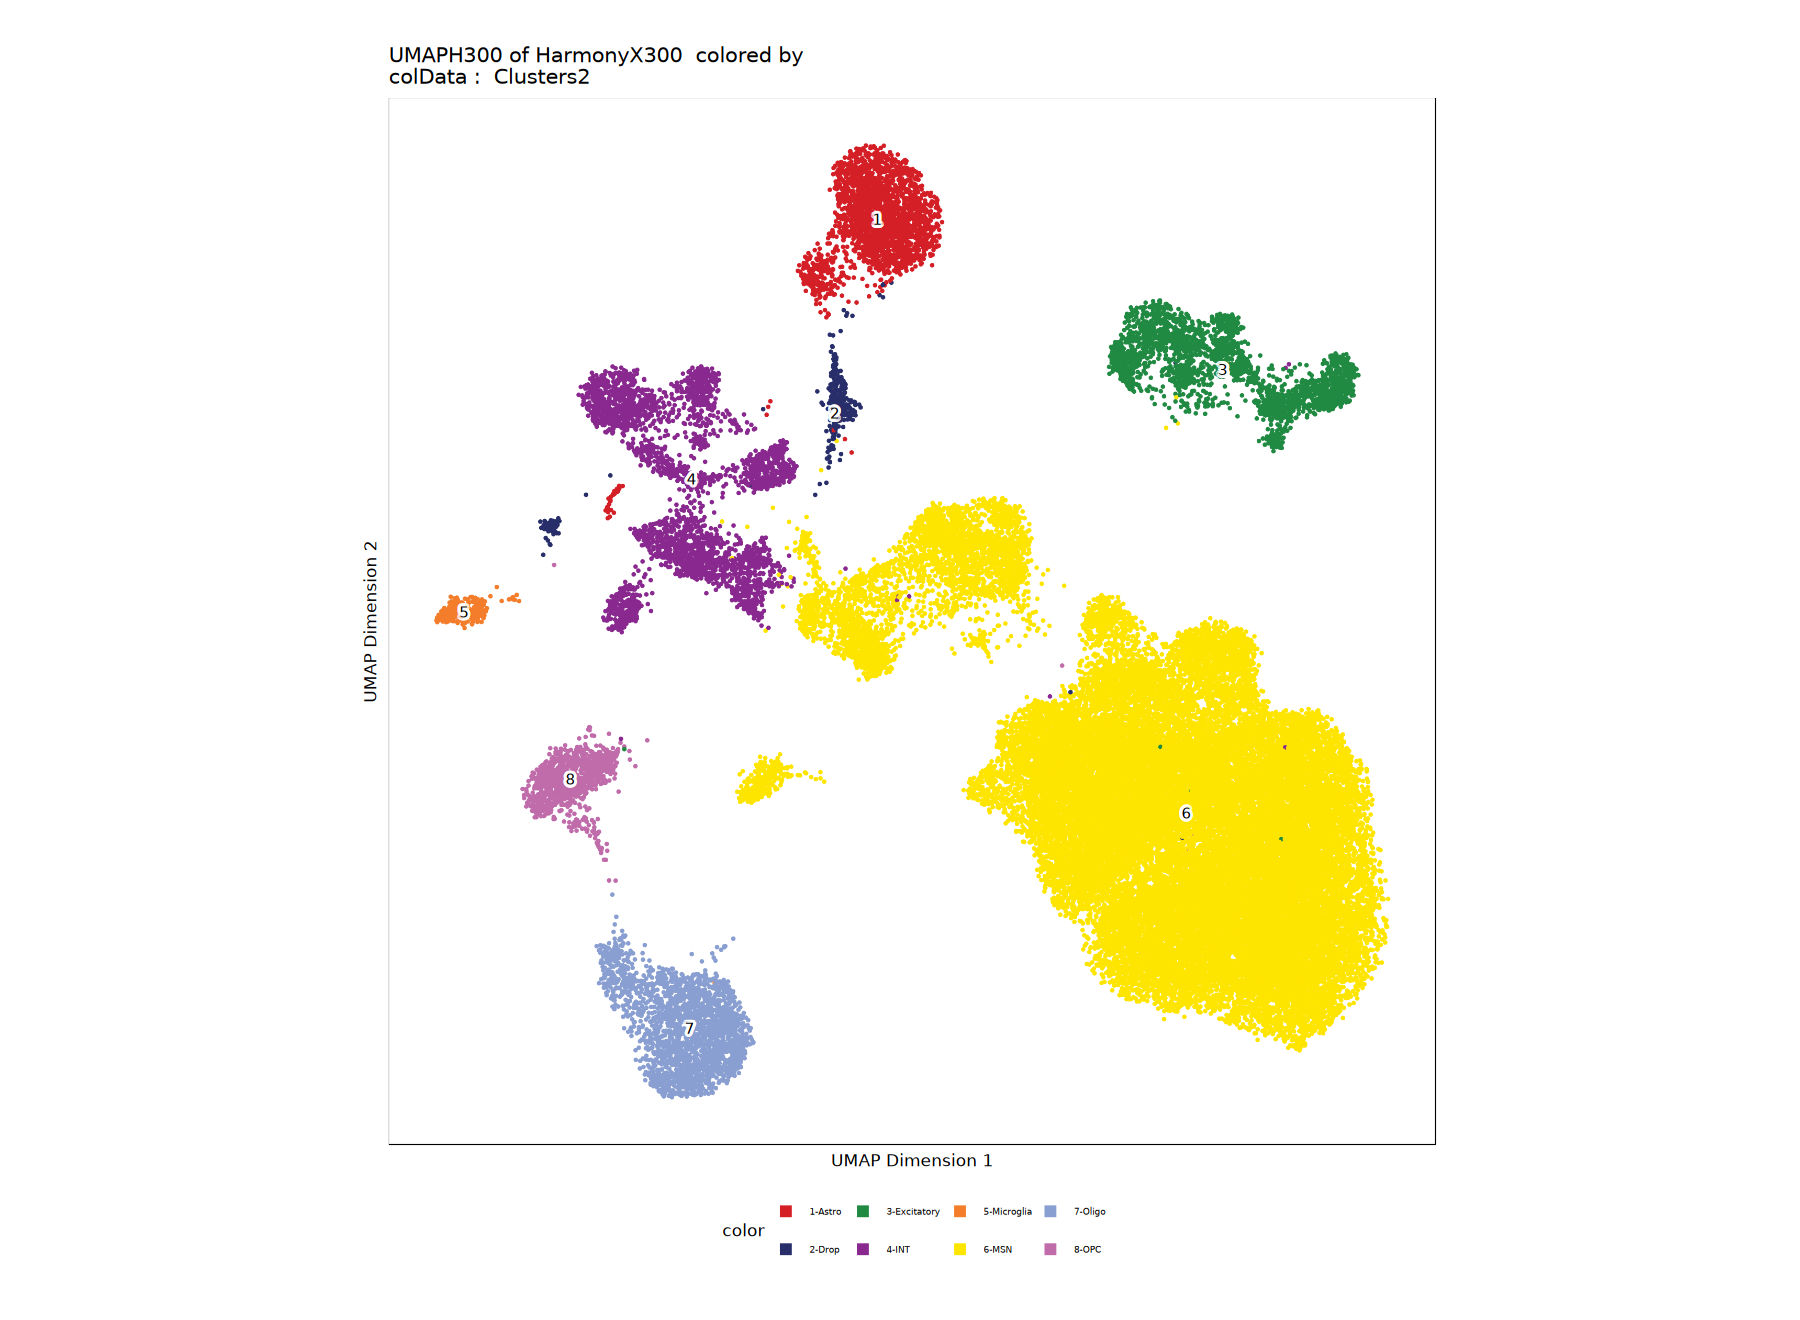

In [16]:
## make UMAP plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "Clusters2", embedding = "UMAPH300")
p1

In [17]:
idxSample <- BiocGenerics::which(proj$Clusters2 %ni% "Drop")
cellsSample <- proj$cellNames[idxSample]

proj = saveArchRProject(ArchRProj = proj)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

In [20]:
# drop the drop clusters and make a copy that's just the MSNs
ARCHDIR2=here('data/tidy_data/ArchRProjects/BICCN_mouse_Str_snATAC2_MSN')
idxSample <- BiocGenerics::which(proj$Clusters2 %in% "MSN")
cellsSample <- proj$cellNames[idxSample]

proj2 = subsetArchRProject(
  ArchRProj = proj,
  cells = cellsSample,
  outputDirectory = ARCHDIR2, force =T
)

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

Copying ArchRProject to new outputDirectory : /projects/pfenninggroup/singleCell/BICCN_mouse_CATlas_snATAC-seq/data/tidy_data/ArchRProjects/BICCN_mouse_Str_snATAC2_MSN

Copying Arrow Files...

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 2): Embeddings

Copying Other Files (2 of 2): IterativeLSI300

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /           